In [21]:
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def get_data(file: str) -> pd.DataFrame:
    data = []
    with open(f"data\\{file}", "r") as file:
        for idx, line in enumerate(file.readlines()):
            # Skip Metadata lines
            if idx in [0, 1, 2, 3, 4, 6]:
                continue

            data.append(line)

    return pd.read_csv(StringIO("".join(data))).rename(
        columns={
            "Load (lbf)": "Load (lbs)",
        }
    )

In [23]:
brush_tests = [
    "1",
    "2",
    "3",
    "4",
    # "5",
    # "5a",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
]

dataframes = {}
for brush in brush_tests:
    dataframes[brush] = get_data(f"Ankenman brushes_{brush}.txt")

In [24]:
df = (
    pd.concat(
        [df.reset_index(drop=True) for df in dataframes.values()],
        keys=dataframes.keys(),
        names=["Brush"],
    )
    .reset_index()
    .drop(columns=["level_1"])
)
df_load_max = df.groupby("Brush").max()[["Load (lbs)"]]
df_load_max = df_load_max.reindex(brush_tests)

In [25]:
df_load_max = df_load_max.drop([])
df_load_max

,Load (lbs)
Brush,
1,216
2,107
3,152
4,236
6,127
7,208
8,232
9,220
10,245


In [26]:
n = len(df_load_max)
sample_mean = df_load_max["Load (lbs)"].mean()
sample_median = df_load_max["Load (lbs)"].median()
sample_stddev = df_load_max["Load (lbs)"].std()

In [27]:
def E1(x: np.ndarray) -> np.float64:
    return np.mean(x) - 1.28 * np.std(x, ddof=1)

In [28]:
def get_E1_confidence_interval(sample_size: int) -> np.ndarray:
    data = np.random.normal(
        loc=sample_mean, scale=sample_stddev, size=(10_000, sample_size)
    )

    E1_values = np.apply_along_axis(E1, 1, data)

    E1_mean = E1_values.mean()
    E1_stddev = E1_values.std(ddof=1)

    return np.array([E1_mean - 2 * E1_stddev, E1_mean + 2 * E1_stddev])

In [31]:
E1_intervals = []
for sample_size in range(5, 200, 5):
    E1_intervals.append(get_E1_confidence_interval(sample_size))

E1_intervals = np.array(E1_intervals)
E1_intervals

array([[ 66.90569825, 183.7972266 ],
       [ 81.63803929, 164.98547735],
       [ 88.87878679, 156.37362871],
       [ 93.53825093, 151.00265973],
       [ 96.61104802, 147.97114503],
       [ 98.50765879, 145.51953507],
       [100.12027063, 143.6913835 ],
       [101.44970926, 142.35455496],
       [102.6107389 , 140.88672978],
       [103.62116452, 140.08285203],
       [104.74658658, 139.15063916],
       [105.23045602, 138.35936297],
       [105.98767832, 137.72256081],
       [106.38768143, 137.42764895],
       [106.9458657 , 136.77547934],
       [107.72212818, 135.97771215],
       [108.06961718, 135.60266941],
       [108.25946359, 135.25540491],
       [108.6334982 , 135.04477089],
       [108.89270147, 134.60966034],
       [109.09507781, 134.18533074],
       [109.41105049, 133.79597722],
       [109.70311188, 133.53351594],
       [110.05779027, 133.32772563],
       [110.19663684, 133.17275035],
       [110.44404286, 132.98298453],
       [110.67128349, 132.76404188],
 

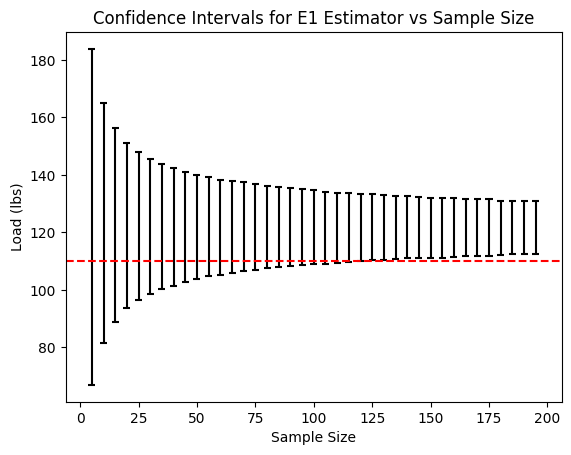

In [32]:
for idx, sample_size in enumerate(range(5, 200, 5)):
    interval = E1_intervals[idx]
    plt.vlines(x=sample_size, ymin=interval[0], ymax=interval[1], color="black")
    plt.hlines(
        y=interval[0], xmin=sample_size - 1.5, xmax=sample_size + 1.5, color="black"
    )
    plt.hlines(
        y=interval[1], xmin=sample_size - 1.5, xmax=sample_size + 1.5, color="black"
    )

plt.axhline(y=110, color="red", linestyle="--", label="110 lbs Threshold")

plt.title("Confidence Intervals for E1 Estimator vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Load (lbs)")

plt.show()